In [81]:
import sys
sys.path.append('../../..')

import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from olfactory_navigation.simulation import SimulationHistory

In [82]:
g_n = 9
sg_n = 7

grid = [g_n, g_n]
sub_grid = [sg_n, sg_n]

folder = '/storage/arnaud/7_test_results/' + '_'.join([str(i) for i in grid]) + '-' + '_'.join([str(i) for i in sub_grid]) + '/'

## Base performance

In [83]:
hist = SimulationHistory.load_from_file(folder + 'base.csv')

conv_mean = hist.analysis_df['converged']['mean']
t_min_over_t_mean = hist.analysis_df['t_min_over_t']['success_mean']

print(f'{conv_mean = :.3f}; {t_min_over_t_mean = :.2f}')

In [84]:
_, ax = plt.subplots(1,1, figsize=(10,10))
hist.plot_successes(ax)

## Diagonal performance

In [85]:
diag_analysis_files = [file for file in os.listdir(folder) if file.startswith('diag') and file.endswith('analysis.csv')]

diag_shifts = (np.arange(len(diag_analysis_files)) * 2) + 1
diag_analysis_files_ordered = [f'diag--{shift}_-{shift}-analysis.csv' for shift in diag_shifts]

diag_analysis_dfs = [pd.read_csv(folder+file, index_col=0) for file in diag_analysis_files_ordered]

# Extracting performance metrics
convergences = []
convergences_std = []
tmin_over_ts = []
tmin_over_ts_std = []

for df in diag_analysis_dfs:
    convergences.append(float(df['converged']['mean']))
    convergences_std.append(float(df['converged']['standard_deviation']))
    tmin_over_ts.append(float(df['t_min_over_t']['success_mean']))
    tmin_over_ts_std.append(float(df['t_min_over_t']['success_standard_deviation']))

Text(0.5, 0, 'Shift from center along diagonal')

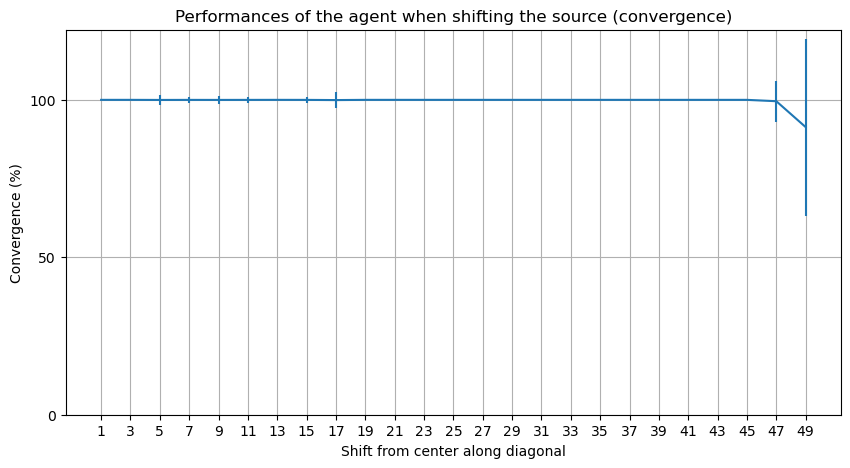

In [86]:
_, (ax0) = plt.subplots(1,1, figsize=(10,5), gridspec_kw={'hspace':0.3})
xs = (np.arange(len(convergences)) * 2) + 1

# Convergence plot
ax0.set_title('Performances of the agent when shifting the source (convergence)')
ax0.errorbar(xs, convergences, convergences_std)

# Other formatting
ax0.grid()
ax0.set_xticks(xs)
ax0.set_yticks([0.0, 0.5, 1.0], labels=[0, 50, 100])
ax0.set_ylabel('Convergence (%)')
ax0.set_xlabel('Shift from center along diagonal')

Text(0.5, 0, 'Shift from center along diagonal')

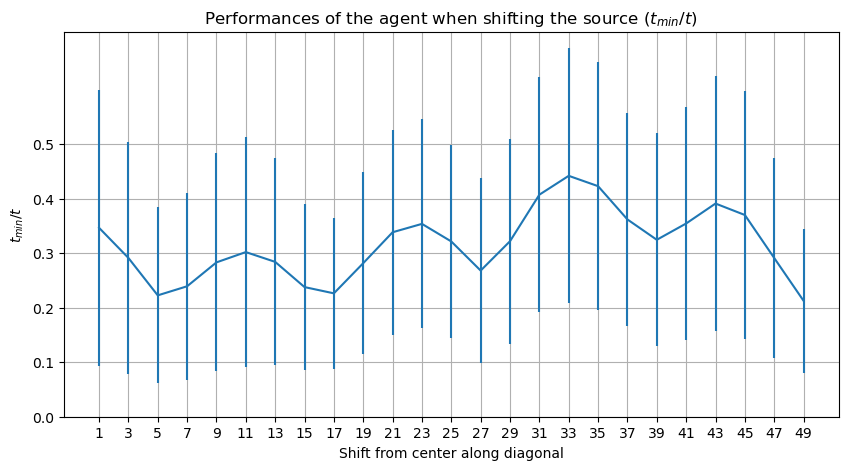

In [87]:
_, (ax1) = plt.subplots(1,1, figsize=(10,5), gridspec_kw={'hspace':0.3})

# tmin over t plot
ax1.set_title('Performances of the agent when shifting the source ($t_{min}/t$)')
ax1.errorbar(xs, tmin_over_ts, tmin_over_ts_std)

# Other formatting
ax1.grid()
ax1.set_xticks(xs)
ax1.set_yticks(np.arange(6)/10)
ax1.set_ylabel('$t_{min}/t$')
ax1.set_xlabel('Shift from center along diagonal')

## Grid performance

In [88]:
point_array = np.array(list(np.ndindex(5,5))) * -2

grid_analysis_files = ['grid-' + '_'.join([str(i) for i in point.tolist()]) + '-analysis.csv' for point in point_array]
grid_analysis_dfs = [pd.read_csv(folder+file, index_col=0) for file in grid_analysis_files]

# Extracting performance metrics
point_convergences = []
point_convergences_std = []
point_tmin_over_ts = []
point_tmin_over_ts_std = []

for df in grid_analysis_dfs:
    point_convergences.append(float(df['converged']['mean']))
    point_convergences_std.append(float(df['converged']['standard_deviation']))
    point_tmin_over_ts.append(float(df['t_min_over_t']['success_mean']))
    point_tmin_over_ts_std.append(float(df['t_min_over_t']['success_standard_deviation']))

point_array_norm = (point_array * -1/2).astype(int)

point_convergences_array = np.zeros((5,5))
point_convergences_array[*point_array_norm.T] = point_convergences
point_convergences_std_array = np.zeros((5,5))
point_convergences_std_array[*point_array_norm.T] = point_convergences_std

point_tmin_over_ts_array = np.zeros((5,5))
point_tmin_over_ts_array[*point_array_norm.T] = point_tmin_over_ts
point_tmin_over_ts_std_array = np.zeros((5,5))
point_tmin_over_ts_std_array[*point_array_norm.T] = point_tmin_over_ts_std

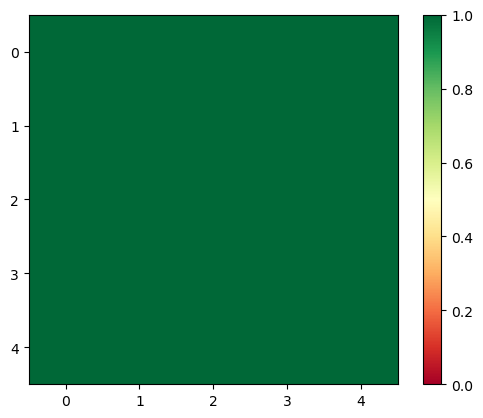

In [89]:
# Convergence plot
plt.imshow(point_convergences_array, cmap='RdYlGn', vmax=1.0, vmin=0.0)
plt.colorbar()
plt.show()

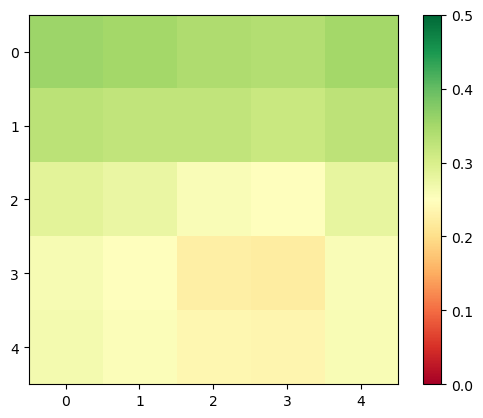

In [90]:
# Convergence plot
plt.imshow(point_tmin_over_ts_array, cmap='RdYlGn', vmax=0.5, vmin=0.0)
plt.colorbar()
plt.show()